In [6]:
import os
import pandas as pd


In [7]:
# directory holding the sample of 18 pdfs
samplepdf = '../1.Web Scrapping/PDF'

# capturing all the pdfs
# allpdf = os.listdir(samplepdf)
pdffile = os.listdir(samplepdf)

# displaying total number of pdfs used
totalpdfs = len(pdffile)

print("Total pdfs = ",totalpdfs)

print("PDF names:")
allfiles=[]
for pdf in pdffile:
    allfiles.append(pdf)

for names in allfiles:
    print(names)
    

Total pdfs =  18
PDF names:
INQ000350057.pdf
INQ000350094.pdf
INQ000350513.pdf
INQ000350691.pdf
INQ000383581.pdf
INQ000383585.pdf
INQ000383998.pdf
INQ000385719.pdf
INQ000395589.pdf
INQ000395913.pdf
INQ000396684.pdf
INQ000396685.pdf
INQ000396686.pdf
INQ000400585.pdf
INQ000412042.pdf
PHT000000014.pdf
PHT000000030.pdf
PHT000000039.pdf


In [8]:
considerfile=[filename for filename in allfiles if filename.startswith("INQ")]


# filtering to use only pdf which has INQ number in filename [Note: these are evidence docs]
for filename in considerfile:
    print(filename)


considerPDFcount=len(considerfile)
# number of pdf documents
print(considerPDFcount)


INQ000350057.pdf
INQ000350094.pdf
INQ000350513.pdf
INQ000350691.pdf
INQ000383581.pdf
INQ000383585.pdf
INQ000383998.pdf
INQ000385719.pdf
INQ000395589.pdf
INQ000395913.pdf
INQ000396684.pdf
INQ000396685.pdf
INQ000396686.pdf
INQ000400585.pdf
INQ000412042.pdf
15


## Using PyPDF

In [9]:
import os
import re
from pypdf import PdfReader

def pypdfextract(pdffiles):
    with open(pdffiles, 'rb') as f:
        # reading the content
        reader = PdfReader(f)
        results = []

        for page in reader.pages:
            # extracting the content
            text = page.extract_text()
            if text:
                results.append(text)

        # all the words are separate with spaces
        alltexts = ' '.join(results)
        
        return alltexts

textdocspypdf = 'PYPDF1/PYPDF1docs/'
#if directory is not present, create it
os.makedirs(textdocspypdf, exist_ok=True)

for i in range(0, considerPDFcount):
    try:
        # pdfs with INQ
        filename = considerfile[i]
        print(filename)
        
        # extracting the text from the directory
        extractedtext = pypdfextract(f'../1.Web Scrapping/PDF/{filename}')
        file = os.path.splitext(filename)[0]
        # storing the text in directory
        with open(os.path.join(textdocspypdf, f'{file}.txt'), 'w', encoding='utf-8') as f:
            f.write(extractedtext)
    except Exception as e:
        print(f"Exception for PDF {filename} as {e}")


INQ000350057.pdf
INQ000350094.pdf
INQ000350513.pdf
INQ000350691.pdf
INQ000383581.pdf
INQ000383585.pdf
INQ000383998.pdf
INQ000385719.pdf
INQ000395589.pdf
INQ000395913.pdf
INQ000396684.pdf
INQ000396685.pdf
INQ000396686.pdf
INQ000400585.pdf
INQ000412042.pdf


## Using only PYPDF2 library


In [12]:
import PyPDF2
import os

In [13]:
def pydf2extract(pdffiles):

    with open(pdffiles,'rb') as f:
        reader = PyPDF2.PdfReader(f)
    
        results = []

        for page in (reader.pages):
            
            text = page.extract_text()
            if text:
                results.append(text)
    return ' '.join(results) # convert list to a single doc 

textdocspypdf='PYPDF2/PYPDF2docs/'
#if directory is not present, create it
os.makedirs(textdocspypdf, exist_ok=True)

for i in range(0,considerPDFcount):
    try:
        # pdfs with INQ
        filename=considerfile[i]
        print(filename)
        
        # extracting the text from the pdf
        extractedtext = pydf2extract(f'../1.Web Scrapping/PDF/{filename}')
        file = os.path.splitext(filename)[0]
        # creating and storing the result into the directory
        with open(os.path.join(textdocspypdf, f'{file}.txt'), 'w', encoding='utf-8') as f:
            f.write(extractedtext)
    except Exception as e:
        print(f"Exception for PDF {filename} as {e}")


INQ000350057.pdf
INQ000350094.pdf
INQ000350513.pdf
INQ000350691.pdf
INQ000383581.pdf
INQ000383585.pdf
INQ000383998.pdf
INQ000385719.pdf
INQ000395589.pdf
INQ000395913.pdf
INQ000396684.pdf
INQ000396685.pdf
INQ000396686.pdf
INQ000400585.pdf
INQ000412042.pdf


## Using PYMUDF extraction

In [6]:
import os
import fitz

def pymupdfextract(PDF_File):
    doc = fitz.open(PDF_File)
    results=[]
    for eachpage in range(len(doc)):
            page = doc.load_page(eachpage)
            # page content from pdfs are extracted
            text = page.get_text()
            results.append(text)
        
    doc.close()
      
    return "\n".join(results)

textdocspymu='PymuPDF/PymuPDFDocs'
#if directory is not present, create it
os.makedirs(textdocspymu, exist_ok=True)

for i in range(0,considerPDFcount):
    try:
        # pdfs with INQ
        filename=considerfile[i]
        print(filename)
        
        # extracting the text from the directory
        extractedtext = pymupdfextract(f'../1.Web Scrapping/PDF/{filename}')
        file = os.path.splitext(filename)[0]
        # storing the text in directory
        with open(os.path.join(textdocspymu, f'{file}.txt'), 'w', encoding='utf-8') as f:
            f.write(extractedtext)
    except Exception as e:
        print(f"Exception for PDF {filename} as {e}")


INQ000350057.pdf
INQ000350094.pdf
INQ000350513.pdf
INQ000350691.pdf
INQ000383581.pdf
INQ000383585.pdf
INQ000383998.pdf
INQ000385719.pdf
INQ000395589.pdf
INQ000395913.pdf
INQ000396684.pdf
INQ000396685.pdf
INQ000396686.pdf
INQ000400585.pdf
INQ000412042.pdf


## Using Pytesseract library

In [12]:
# pdflist which has the random sample of documents from the downloaded PDFdocs directory
import os
from PIL import Image
import pytesseract
from io import BytesIO
import fitz  

# installation of the tesseract.exe is required
# link to downlaod tessearact https://github.com/UB-Mannheim/tesseract/wiki
# once installed, save it into directory and below is the line of code which is using the directory where, the tesseract.exe is located
pytesseract.pytesseract.tesseract_cmd = r'F:\viraj\Tesseract\tesseract.exe'

def pytesseractextract(pdfpath):
    results = []

    try:
        doc = fitz.open(pdfpath)

        for eachpage in range(len(doc)):
            page = doc.load_page(eachpage)

            for img in page.get_images(full=True):
                # reference id of the image
                ref = img[0]
                # extracting the image data using reference id
                baseimg = doc.extract_image(ref)
                # binary data of image is obtained
                bytesimg = baseimg["image"]
                # loading the image from binary data
                image = Image.open(BytesIO(bytesimg))
                # capturing text from the images
                imgtext = pytesseract.image_to_string(image)

                results.append(imgtext)

        doc.close()
    
    except Exception as e:
        print(f"Error extracting text from {pdfpath}: {e}")
    
    return "\n".join(results)

textdocspytes = 'Pytesseract/PytesseractDocs'
#if directory is not present, create it
os.makedirs(textdocspytes, exist_ok=True)


for i in range(0,considerPDFcount):
    try:
        # pdfs with INQ
        filename=considerfile[i]
        print(filename)
        # function to extract text
        extractedtext = pytesseractextract(f'../1.Web Scrapping/PDF/{filename}')
        file = os.path.splitext(filename)[0]
        # storing the text in directory
        with open(os.path.join(textdocspytes, f'{file}.txt'), 'w', encoding='utf-8') as f:
            f.write(extractedtext)
    except Exception as e:
        print(f"Exception for PDF {filename} as {e}")


INQ000350057.pdf
INQ000350094.pdf
INQ000350513.pdf
INQ000350691.pdf
INQ000383581.pdf
INQ000383585.pdf
INQ000383998.pdf
INQ000385719.pdf
INQ000395589.pdf
INQ000395913.pdf
INQ000396684.pdf
INQ000396685.pdf
INQ000396686.pdf
INQ000400585.pdf
INQ000412042.pdf


## PDFPlumber Library

In [7]:
import pdfplumber
import os

def pdfplumberextract(pdffiles):
    results = []
    with pdfplumber.open(pdffiles) as pdf:
        for page in pdf.pages:
            # extracting the content
            text = page.extract_text()
            if text:
                results.append(text)

    return ' '.join(results)

textdocspdfplumber = 'PDFPlumber/PdfPlumberDocs'
# if directory is not present, create it
os.makedirs(textdocspdfplumber, exist_ok=True)


for i in range(0, considerPDFcount):
    try:
        # pdfs with INQ
        filename = considerfile[i]
        print(filename)
        
        # function to extract text from pdfs 
        extractedtext = pdfplumberextract(f'../1.Web Scrapping/PDF/{filename}')
        file = os.path.splitext(filename)[0]
        
        # storing the text in directory
        with open(os.path.join(textdocspdfplumber, f'{file}.txt'), 'w', encoding='utf-8') as f:
            f.write(extractedtext)
    except Exception as e:
        print(f"Exception for PDF {filename} as {e}")


INQ000350057.pdf
INQ000350094.pdf
INQ000350513.pdf
INQ000350691.pdf
INQ000383581.pdf
INQ000383585.pdf
INQ000383998.pdf
INQ000385719.pdf
INQ000395589.pdf
INQ000395913.pdf
INQ000396684.pdf
INQ000396685.pdf
INQ000396686.pdf
INQ000400585.pdf
INQ000412042.pdf


## TIKA Library

In [9]:
import os
from tika import parser


def tikaextract(pdffile):
    try:
        # extracting content from pdfs
        parsed = parser.from_file(pdffile)
        return parsed['content']
    except Exception as e:
        print(f"Exception for file {pdffile}: {e}")
        return ''

textdocstika = 'TIKA/TIKAdocs/'
# if directory is not present, create it
os.makedirs(textdocstika, exist_ok=True)


for i in range(considerPDFcount):
    try:
        # pdfs with INQ
        filename = considerfile[i]
        print(f'{filename}')
        
        # defining function to extract text from pdfs
        extractedtext = tikaextract(f'../1.Web Scrapping/PDF/{filename}')
        file = os.path.splitext(filename)[0]
        
        # storing the text in directory
        with open(os.path.join(textdocstika, f'{file}.txt'), 'w', encoding='utf-8') as f:
            f.write(extractedtext.strip())  # remove whitespaces after extraction
    except Exception as e:
        print(f"Exception for PDF {filename}: {e}")


INQ000350057.pdf
INQ000350094.pdf
INQ000350513.pdf
INQ000350691.pdf
INQ000383581.pdf
INQ000383585.pdf
INQ000383998.pdf
INQ000385719.pdf
INQ000395589.pdf
INQ000395913.pdf
INQ000396684.pdf
INQ000396685.pdf
INQ000396686.pdf
INQ000400585.pdf
INQ000412042.pdf


## PDFMiner

In [10]:
import os
from pdfminer.high_level import extract_text


def pdfminerextract(pdffile):
    try:
        # extraction of text from the pdf
        text = extract_text(pdffile)
        return text
    except Exception as e:
        print(f"Exception for file {pdffile}: {e}")
        return ''

textdocspdfminer = 'PDFminer/PDFMinerDocs/'
# if directory is not present, create it
os.makedirs(textdocspdfminer, exist_ok=True)

for i in range(0,considerPDFcount):
    try:
        # pdfs with INQ
        filename=considerfile[i]
        print(filename)
        
        # function defined for extraction of text from pdf
        extractedtext = pdfminerextract(f'../1.Web Scrapping/PDF/{filename}')
        file = os.path.splitext(filename)[0]
        # storing the text in directory
        with open(os.path.join(textdocspdfminer, f'{file}.txt'), 'w', encoding='utf-8') as f:
            f.write(extractedtext)
    except Exception as e:
        print(f"Exception for PDF {filename} as {e}")


INQ000350057.pdf
INQ000350094.pdf
INQ000350513.pdf
INQ000350691.pdf
INQ000383581.pdf
INQ000383585.pdf
INQ000383998.pdf
INQ000385719.pdf
INQ000395589.pdf
INQ000395913.pdf
INQ000396684.pdf
INQ000396685.pdf
INQ000396686.pdf
INQ000400585.pdf
INQ000412042.pdf


# Finding the number of characters captured by each library

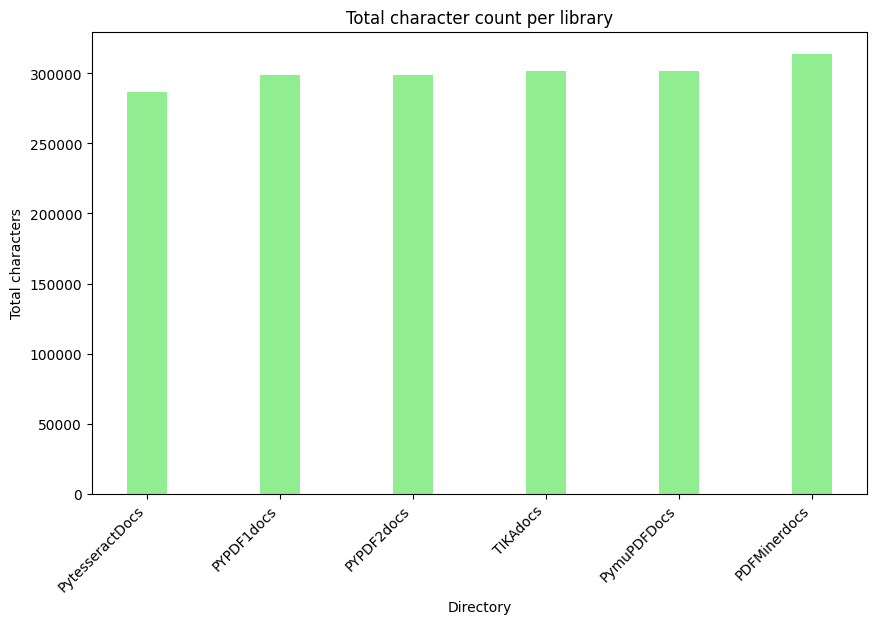

In [14]:
import os
import matplotlib.pyplot as plt

def countchars(dirpath):
    # all the files from directory
    txtfiles = [f for f in os.listdir(dirpath)]

    # altogether total characters in the text file
    countchar = 0
    for filename in txtfiles:
        filepath = os.path.join(dirpath, filename)
        with open(filepath, 'r', encoding='utf-8') as file:
            countchar += len(file.read())
    
    return countchar

def display(directories):
    
    dirnames = []
    charcount = []

    for directory in directories:
        # obtaining the names of the directory
        dirname = os.path.basename(directory)
        
        # finding the total character
        countchar = countchars(directory)
        
        # storing the obtained results
        dirnames.append(dirname)
        charcount.append(countchar)

    # sorting based on the character counts
    sort = sorted(zip(charcount, dirnames))
    charcount, dirnames = zip(*sort)

    # visualising the data
    plt.figure(figsize=(10, 6))
    plt.bar(dirnames, charcount, color='lightgreen', width=0.3)
    plt.xlabel('Directory')
    plt.ylabel('Total characters')
    plt.title('Total character count per library')
    plt.xticks(rotation=45, ha='right')  
    plt.show()

# list of directories
directories = [
    '../2.PDFExtraction/PYPDF1/PYPDF1docs',
    '../2.PDFExtraction/PYPDF2/PYPDF2docs',
    '../2.PDFExtraction/PymuPDF/PymuPDFDocs',
    '../2.PDFExtraction/Pytesseract/PytesseractDocs',
    '../2.PDFExtraction/PDFMiner/PDFMinerdocs',
    '../2.PDFExtraction/TIKA/TIKAdocs',
    
]

display(directories)
